In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# 1. Dataset introduction

## 1.1. Dataset as a table

In [4]:
students = pd.read_csv('student_scores.csv')
students.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## 1.2. Dataset as a plot

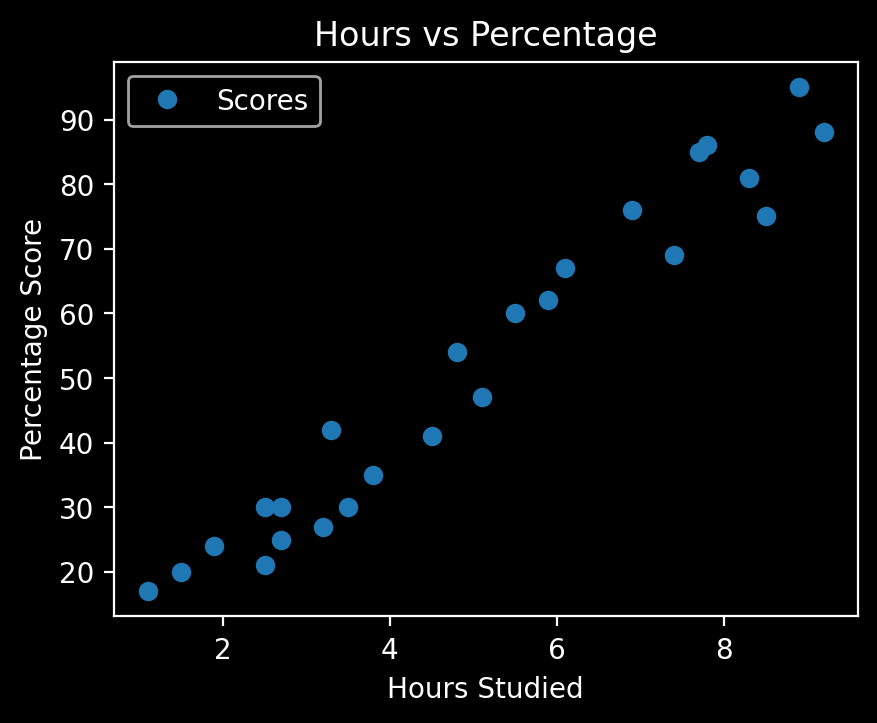

In [5]:
students.plot(x = 'Hours', y = 'Scores', style  = 'o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# 2. Dataset preparation

In [6]:
X = np.array(students.Hours).reshape(-1, 1)
y = np.array(students.Scores).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_answer = np.array([9.5]).reshape(-1, 1)

# 3. Model construction

## 3.1. LinearRegression model

In [7]:
lr = LinearRegression(positive=True)
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)

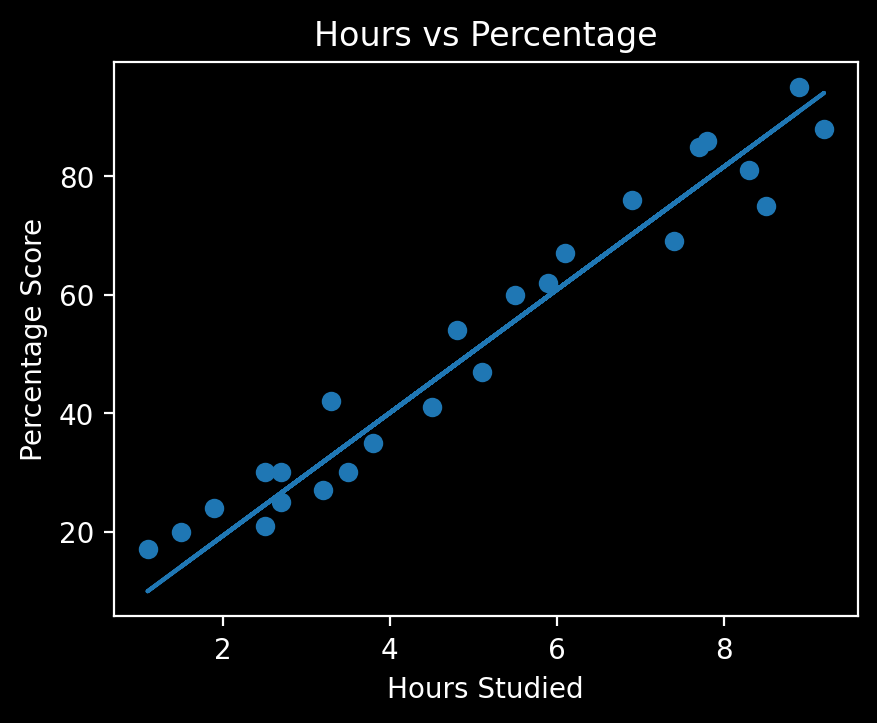

In [8]:
# Plotting the regression line
line = lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

## 3.2. DecisionTreeRegressor model

In [10]:
dtr = DecisionTreeRegressor(random_state=0, max_depth=4)
dtr.fit(X_train, y_train)
dtr_y_pred = dtr.predict(X_test)

## 3.3. ExtraTreeRegressor model

In [9]:
etr = ExtraTreesRegressor(random_state=0)
etr.fit(X_train, y_train)
etr_y_pred = etr.predict(X_test)

<ipython-input-9-f6f219c27315>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  etr.fit(X_train, y_train)


## 3.4. RandomForestRegressor model

In [11]:
rfr = RandomForestRegressor(random_state=0)
rfr.fit(X_train, y_train)
rfr_y_pred = rfr.predict(X_test)

<ipython-input-11-47ca16dcad2d>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


# 4. Model comparison

I compare prediction of four models

## 4.1. Comparison by dataframe

In [1]:
models = pd.DataFrame({'X': X_test.reshape(-1),
                       'y_test': y_test.reshape(-1),
                       'lr': lr_y_pred.reshape(-1),
                       'dt': dtr_y_pred.reshape(-1),
                       'etr': etr_y_pred.reshape(-1),
                       'rfr': rfr_y_pred.reshape(-1)})
models

,X,y_test,lr,dt,etr,rfr
0,3.3,42,32.788042,27.333333,28.02,28.718333
1,9.2,88,94.033495,95.000000,95.00,89.730000
2,1.1,17,9.950755,24.000000,24.00,23.650000
3,2.5,30,24.483574,21.000000,21.00,23.126667
4,1.5,20,14.102989,24.000000,24.00,23.650000
5,6.9,76,70.158149,69.000000,68.38,73.350000
6,5.1,47,51.473095,54.000000,56.46,53.990000


## 4.2. Comparison by scatter plot

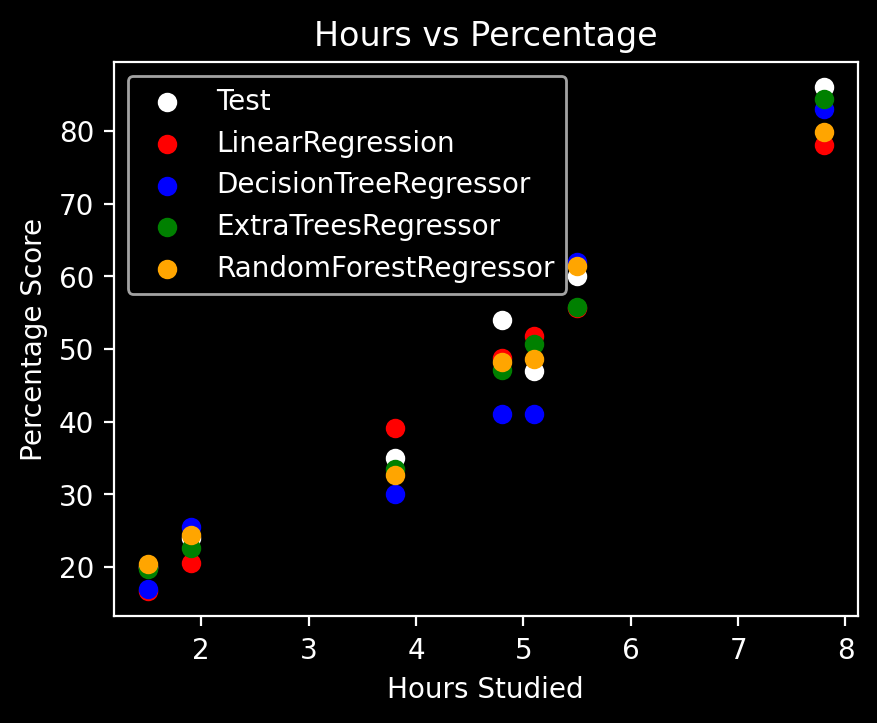

In [126]:
plt.scatter(X_test, y_test, color='white')
plt.scatter(X_test, lr_y_pred, color='red')
plt.scatter(X_test, dtr_y_pred, color='blue')
plt.scatter(X_test, etr_y_pred, color='green')
plt.scatter(X_test, rfr_y_pred, color='orange')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.legend(['Test', 'LinearRegression', 'DecisionTreeRegressor', 'ExtraTreesRegressor', 'RandomForestRegressor'])
plt.show()

## 4.3. Comparison by bar plot

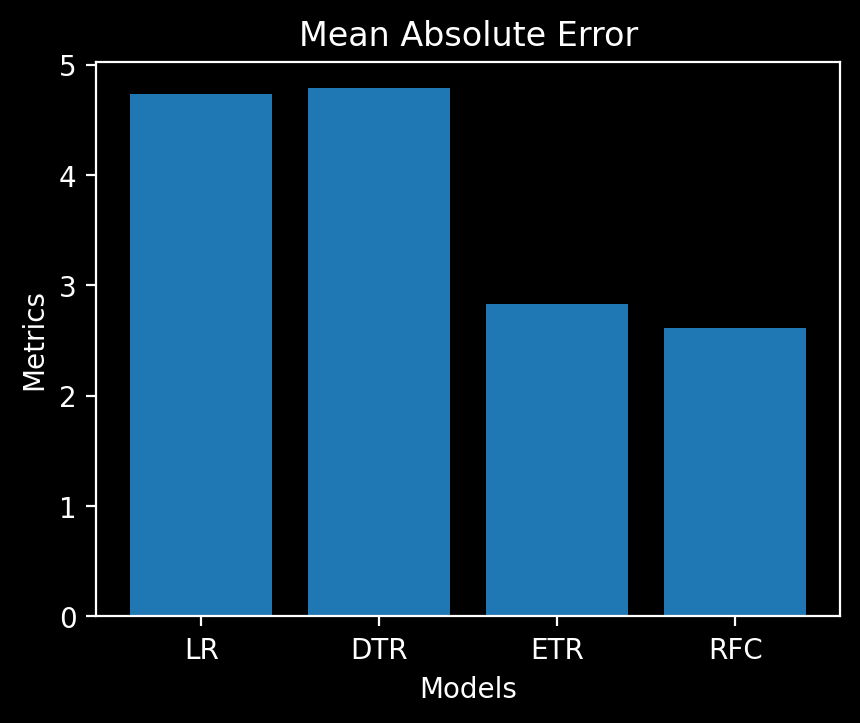

In [127]:
plt.bar(
    ['LR', 'DTR', 'ETR', 'RFC'],
        [mean_absolute_error(y_test, lr_y_pred).reshape(-1)[0],
         mean_absolute_error(y_test, dtr_y_pred).reshape(-1)[0],
         mean_absolute_error(y_test, etr_y_pred).reshape(-1)[0],
         mean_absolute_error(y_test, rfr_y_pred).reshape(-1)[0]])
plt.title('Mean Absolute Error')  
plt.xlabel('Models')  
plt.ylabel('Metrics')  
plt.show()

# 5. Choosing the model

The model with the least MSE is RandomForestRegressor model. I predict, how many scores can student obtain with 9.5 hours working?

In [128]:
rfr_answer = RandomForestRegressor(random_state=0)
rfr_answer.fit(X, y)
rfr_pred_answ = rfr.predict(X_answer)
print(f'Prediction for {X_answer.reshape(-1)[0]} hours is {rfr_pred_answ[0]}')

Prediction for 9.5 hours is 88.68


<ipython-input-128-f0369a4eb4df>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_answer.fit(X, y)
